# DATA SOURCES - Part 2

## Github link 
https://github.com/Ditto25/IND320-Steamlit-app.git

## Streamlit link
https://ind320-steamlit-app-ditto.streamlit.app/


## **AI Usage**

Throughout this project, I have utilized **GitHub Copilot** and **ChatGPT-4** as supportive tools to better understand various concepts, debug issues, and improve the overall quality of the implementation. The assistance covered several key areas:

### **API**

Received guidance on understanding and working with the **Elhub API**, including implementing a **loop-based data retrieval system** to handle month-by-month requests, merging multiple months into a single dataset, adding **error handling**, and exporting the final dataset as a **JSON file**.

### **Database**

Received help with **designing the Cassandra table schema**, including choosing appropriate **primary keys** and **clustering order** for time-series data. Additionally, I received guidance on how to correctly format **authentication details** in the `.toml` configuration file and on understanding **URL encoding** for secure database connections.

### **Spark**

Gained assistance with **setting up Apache Spark**, ensuring compatibility between the **Hadoop** and **Java** versions, and configuring the **Spark–Cassandra connector**. Also received guidance on **column renaming**, **data type conversion**, and managing **timestamp fields** in Spark DataFrames.

### **Data Visualization**

Received support in creating **matplotlib visualizations**, including two **pie charts** with percentage labels and properly formatted **multi-line plots** with legends and titles for clear data representation.

### **MongoDB Integration**

Assistance with **inserting documents**, performing **query operations**, and **verifying data integrity** across MongoDB collections to ensure consistent and accurate data storage.

### **Streamlit Development**

Guidance on building the **Streamlit interface**, including implementing a **two-column layout**, adding **interactive widgets** (such as radio buttons, pills, and select boxes), and applying **effective caching strategies** to optimize performance.

### **Error Handling**

Help with adding **try-except blocks** and designing **user-friendly error messages** for handling database connections, API requests, and general data operations.

### **Language and Grammar**
AI tools were also used to improve the language and grammar in the report. They assisted with proofreading, sentence clarity, and ensuring a consistent and formal tone throughout the text. 

# WORKLOAD
Throughout this project, I have developt a complete pipeline for collecting, pricessing, storing and Visualizing energy production data. The work invovled API integration, database design, Spark processing, data visualization, Streamlit development and error handling. 

## API Integration
I implemented a month-by-month data retrieval system from Elhub API to handle API limitations. This included URL formatting and encoding and merging month's data into a singel JSON dataset. 

## Spark Data Processing
I sat up Spark With HADOOP and JAVA versions and checked the Spark-Cassandra connection. Also renamed columns and converting timestamps

This process was quite time-consuming. Initially, I did not fully understand the purpose of having a HADOOP folder in my home directory, but after researching online and using AI tools for guidance, I was able to configure it correctly and get everything working.

## Data Visulization 
I used Matplotlib and Plotly to visualize two pie charts and multi-line plots. By creating two separate pie charts, I aimed to clearly show all production groups, as it was difficult to see every group in a single chart.

## MongoDB 
I created a MongoDB account and database to store and manage the energy production data. Setting up the database was initially challenging, but I managed to configure it successfully and establish a stable connection.

I then implemented document insertion, querying, and data verification across MongoDB collections to ensure data consistency. During this process, I encountered challenges such as authentication issues, query errors, and data structure inconsistencies, which required careful troubleshooting.

A particular challenge was handling special characters in the password, which required URL encoding to make the connection URI functional. Overcoming this issue gave me a deeper understanding of database authentication and secure connection handling.

I adopted this approach after experimenting with multiple configurations, which ultimately provided a reliable and maintainable integration with the rest of the project. The full usage of MongoDB in data operations is described in more detail in the project workflow

## Streamlit 
I developed an interactive third page featuring a two-column layout with dynamic widgets such as radio buttons, pills, and select boxes. In addition to the original functionality, I implemented two enhanced visualizations:

- **Dual Pie Charts** – One chart displays the total production distribution across all groups, while a second chart highlights smaller contributors (<5% of total production), making it easier to analyze less dominant production types.

- **Dual Line Plots** – One plot shows the production trends for all selected groups over time, and a second plot focuses on smaller production groups, providing clearer insights into minor contributors.

These enhancements improve the usability and interpretability of the application, allowing users to explore both overall and detailed perspectives of energy production data interactively.

## Error Handling
I added try-except blocks and user-friendly error messages for API calls, database connections, and general data operations. This ensured the application could handle unexpected issues.

## Some Reflections
Through this project, I personally strengthened my skills in data engineering, API integration, and data visualization, while gaining practical experience in database management, Spark processing, and building interactive web applications. 

I encountered several challenges, including working with time-series data from multiple sources, ensuring data consistency across databases, and configuring Spark and Streamlit environments. By actively experimenting, troubleshooting, and researching solutions from AI,  I was able to solve problems independently, understand complex workflows, and implement reliable solutions. 

This process allowed me to remain deeply engaged with every step of the project and to gain confidence in handling both technical and design challenges.


In [7]:
import toml
from pymongo import MongoClient
from pymongo.server_api import ServerApi
# Load secrets
secrets = toml.load(".streamlit/secrets.toml")
uri = secrets["MONGO"]["uri"]

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


## Spark and Cassandra

In [8]:
import os
# --- Java + Hadoop setup ---
os.environ["JAVA_HOME"] = r"C:\Program Files\Microsoft\jdk-17.0.16.8-hotspot"
os.environ["HADOOP_HOME"] = r"C:\Hadoop\hadoop-3.3.1"
os.environ["PYSPARK_HADOOP_VERSION"] = "without"
os.environ["PATH"] = os.path.join(os.environ["JAVA_HOME"], "bin") + ";" + os.path.join(os.environ["HADOOP_HOME"], "bin") + ";" + os.environ["PATH"]


In [9]:
# Import Cassandra cluster connection
from cassandra.cluster import Cluster
# Connect to Cassandra cluster
cluster = Cluster(['localhost'], port=9042)
session = cluster.connect()
print("Connected to Cassandra cluster:", cluster)

Connected to Cassandra cluster: <cassandra.cluster.Cluster object at 0x0000021984BF1E90>


In [10]:
# Import Spark session for distributed data processing
from pyspark.sql import SparkSession

# Create or get existing Spark session with Cassandra connector configuration
spark = SparkSession.builder.appName('SparkCassandraApp').\
    config('spark.jars.packages', 'com.datastax.spark:spark-cassandra-connector_2.12:3.5.1').\
    config('spark.cassandra.connection.host', 'localhost').\
    config('spark.sql.extensions', 'com.datastax.spark.connector.CassandraSparkExtensions').\
    config('spark.sql.catalog.mycatalog', 'com.datastax.spark.connector.datasource.CassandraCatalog').\
    config('spark.cassandra.connection.port', '9042').getOrCreate()
# Some warnings are to be expected.
# If running this cell does not give any output after ~30 seconds, there is likely an error in the configuration (JAVA_HOME, HADOOP_HOME, etc.).

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 65456)
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "C:\Users\Erik\AppData\Local\Packages\Pyth

In [11]:
import os
import requests
import json
from datetime import datetime, timedelta

# Function that retrieves data from the API for a given month
def get_data_for_month(year, month):
    start = datetime(year, month, 1)

    # Find the last day of the current month
    if month == 12:
        end = datetime(year + 1, 1, 1) - timedelta(days=1)
    else:
        end = datetime(year, month + 1, 1) - timedelta(days=1)
        
    # Convert start and end dates to the required API format (URL encoded)
    start_formatted = start.strftime('%Y-%m-%dT00:00:00+02:00')
    end_formatted = end.strftime('%Y-%m-%dT23:59:59+02:00')

    # Replace special characters for URL encoding
    start_formatted = start_formatted.replace(':', '%3A').replace('+', '%2B')
    end_formatted = end_formatted.replace(':', '%3A').replace('+', '%2B')

    # Construct the request URL
    url = (
        f"https://api.elhub.no/energy-data/v0/price-areas"
        f"?dataset=PRODUCTION_PER_GROUP_MBA_HOUR"
        f"&startDate={start_formatted}&endDate={end_formatted}"
    )

    print(f"Fetching data for {start.strftime('%B %Y')}...")

    # Attempt to send the request
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except Exception as error:
        print(f"Failed to fetch data for {start.strftime('%B %Y')}: {error}")
        return None


# Collect data for each month of 2021
merged_data = None

for month in range(1, 13):
    data = get_data_for_month(2021, month)

    if data and 'data' in data:
        if merged_data is None:
            # If this is the first month, store it as the base
            merged_data = data
        else:
            # Merge monthly data into the combined structure
            for new_area in data['data']:
                found = False
                for existing_area in merged_data['data']:
                    if existing_area['attributes']['name'] == new_area['attributes']['name']:
                        existing_area['attributes']['productionPerGroupMbaHour'].extend(
                            new_area['attributes']['productionPerGroupMbaHour']
                        )
                        found = True
                        break
                if not found:
                    merged_data['data'].append(new_area)

        print(f"{datetime(2021, month, 1).strftime('%B')} - data retrieved successfully")
    else:
        print(f"{datetime(2021, month, 1).strftime('%B')} - no data found")

# Save everything into a JSON file
if merged_data:
    # Ensure the target directory exists before writing the file
    if not os.path.isdir('./JSON_data'):
        os.makedirs('./JSON_data', exist_ok=True)

    with open('./JSON_data/production_data.json', 'w') as file:
        json.dump(merged_data, file, indent=4)

    # Count total number of production entries
    total_entries = sum(
        len(area['attributes']['productionPerGroupMbaHour'])
        for area in merged_data['data']
    )

    print(" All 2021 data successfully saved!")
    print(f"Total entries: {total_entries:,}")
    print("File saved at: ./JSON_data/production_data.json")
else:
    print(" No data could be retrieved. Please check your connection or the API service.")


Fetching data for January 2021...
January - data retrieved successfully
Fetching data for February 2021...
February - data retrieved successfully
Fetching data for March 2021...
March - data retrieved successfully
Fetching data for April 2021...
April - data retrieved successfully
Fetching data for May 2021...
May - data retrieved successfully
Fetching data for June 2021...
June - data retrieved successfully
Fetching data for July 2021...
July - data retrieved successfully
Fetching data for August 2021...
August - data retrieved successfully
Fetching data for September 2021...
September - data retrieved successfully
Fetching data for October 2021...
October - data retrieved successfully
Fetching data for November 2021...
November - data retrieved successfully
Fetching data for December 2021...
December - data retrieved successfully
 All 2021 data successfully saved!
Total entries: 215,353
File saved at: ./JSON_data/production_data.json


In [12]:
# Convert the JSON data into a pandas DataFrame
import pandas as pd

# Load the JSON file
with open('./JSON_data/production_data.json', 'r') as f:
    data = json.load(f)
# Extract production records
records = []
for item in data['data']:
    for production in item['attributes']['productionPerGroupMbaHour']:
        records.append(production)

# Create DataFrame
df = pd.DataFrame(records)

# Convert time columns to datetime
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])
df['lastUpdatedTime'] = pd.to_datetime(df['lastUpdatedTime'])

print(df.head())

C:\Users\Erik\AppData\Local\Temp\ipykernel_20184\2146182421.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['startTime'] = pd.to_datetime(df['startTime'])
C:\Users\Erik\AppData\Local\Temp\ipykernel_20184\2146182421.py:18: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['endTime'] = pd.to_datetime(df['endTime'])
C:\Users\Erik\AppData\Local\Temp\ipykernel_20184\2146182421.py:19: FutureWarning: In a future version of pandas, parsing datet

                     endTime            lastUpdatedTime priceArea  \
0  2021-01-01 01:00:00+01:00  2024-12-20 10:35:40+01:00       NO1   
1  2021-01-01 02:00:00+01:00  2024-12-20 10:35:40+01:00       NO1   
2  2021-01-01 03:00:00+01:00  2024-12-20 10:35:40+01:00       NO1   
3  2021-01-01 04:00:00+01:00  2024-12-20 10:35:40+01:00       NO1   
4  2021-01-01 05:00:00+01:00  2024-12-20 10:35:40+01:00       NO1   

  productionGroup  quantityKwh                  startTime  
0           hydro    2507716.8  2021-01-01 00:00:00+01:00  
1           hydro    2494728.0  2021-01-01 01:00:00+01:00  
2           hydro    2486777.5  2021-01-01 02:00:00+01:00  
3           hydro    2461176.0  2021-01-01 03:00:00+01:00  
4           hydro    2466969.2  2021-01-01 04:00:00+01:00  


In [13]:
# Convert pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(df)

# Show the schema
spark_df.printSchema()

# Display first few rows
spark_df.show(10)

# Select specific columns
selected_columns = spark_df.select('priceArea', 'productionGroup', 'quantityKwh', 'startTime')
selected_columns.show(25)

# SPARK TRANSFORMATIONS AND AGGREGATIONS
# For example, group by production type and sum the quantity
from pyspark.sql.functions import sum as spark_sum, col, avg as spark_avg, count, max as spark_max

# Aggregation 1: Total production by group and price area
production_summary = spark_df.groupBy('productionGroup', 'priceArea') \
    .agg(spark_sum('quantityKwh').alias('total_production')) \
    .orderBy(col('total_production').desc())

production_summary.show()

# Aggregation 2: Additional statistics per production group
production_stats = spark_df.groupBy('productionGroup') \
    .agg(
        spark_sum('quantityKwh').alias('total_kwh'),
        spark_avg('quantityKwh').alias('avg_kwh'),
        spark_max('quantityKwh').alias('max_kwh'),
        count('*').alias('record_count')
    ) \
    .orderBy(col('total_kwh').desc())

print("\nProduction Statistics by Group:")
production_stats.show()

# Convert Spark results to pandas for visualization
production_summary_pd = production_summary.toPandas()
production_stats_pd = production_stats.toPandas()

print("\n✓ Spark aggregations completed")
print(f"Summary records: {len(production_summary_pd)}")
print(f"Stats records: {len(production_stats_pd)}")
print("\nSample summary data:")
print(production_summary_pd.head(10))

root
 |-- endTime: struct (nullable = true)
 |-- lastUpdatedTime: struct (nullable = true)
 |-- priceArea: string (nullable = true)
 |-- productionGroup: string (nullable = true)
 |-- quantityKwh: double (nullable = true)
 |-- startTime: struct (nullable = true)

+-------+---------------+---------+---------------+-----------+---------+
|endTime|lastUpdatedTime|priceArea|productionGroup|quantityKwh|startTime|
+-------+---------------+---------+---------------+-----------+---------+
|     {}|             {}|      NO1|          hydro|  2507716.8|       {}|
|     {}|             {}|      NO1|          hydro|  2494728.0|       {}|
|     {}|             {}|      NO1|          hydro|  2486777.5|       {}|
|     {}|             {}|      NO1|          hydro|  2461176.0|       {}|
|     {}|             {}|      NO1|          hydro|  2466969.2|       {}|
|     {}|             {}|      NO1|          hydro|  2467460.0|       {}|
|     {}|             {}|      NO1|          hydro|  2482320.8|       

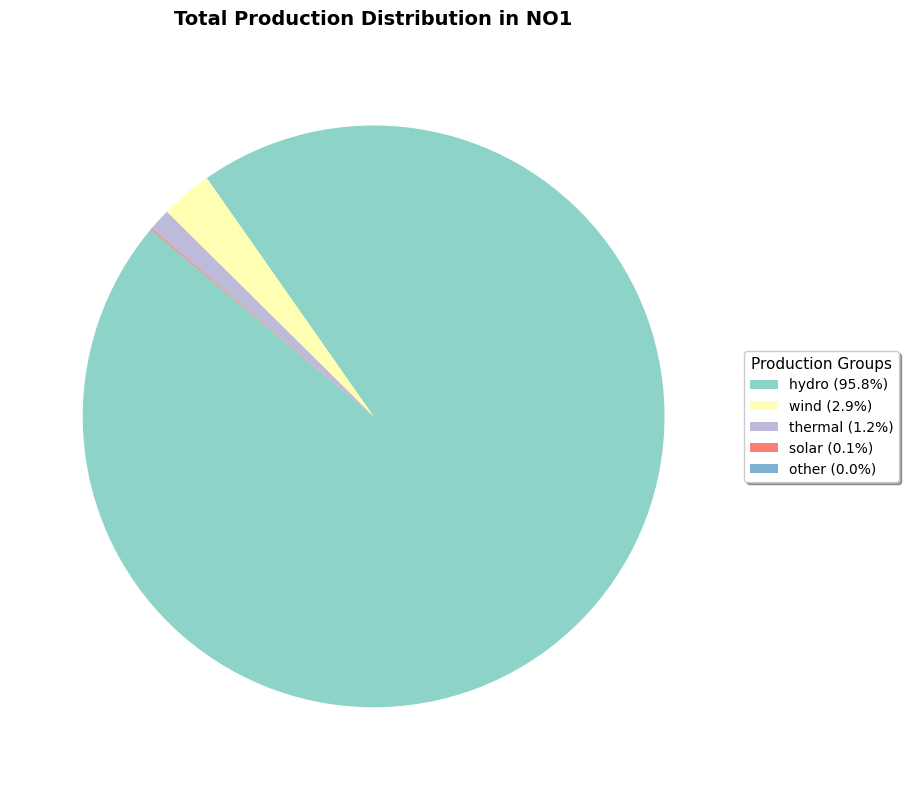

✓ Main pie chart displayed


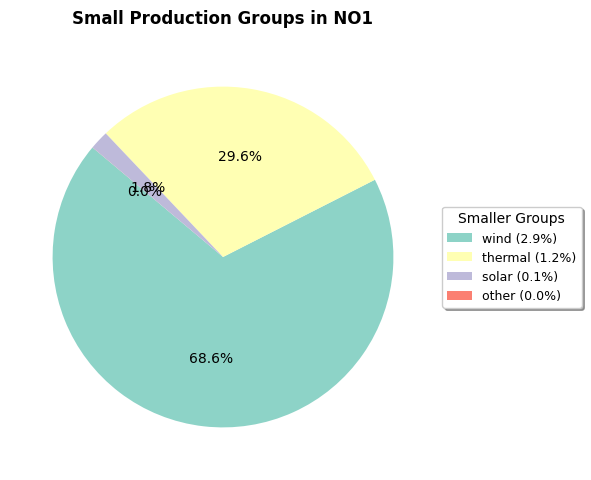

✓ Pie chart for smaller production groups displayed


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for a chosen price area
selected_area = 'NO1'
filtered_data = production_summary_pd[production_summary_pd['priceArea'] == selected_area]
filtered_data = filtered_data.sort_values('total_production', ascending=False)

# Rename columns for consistency
production_summary_chart = filtered_data.copy()
production_summary_chart.columns = ['productionGroup', 'priceArea', 'total_production']

# Calculate total and percentages
total = production_summary_chart['total_production'].sum()
production_summary_chart['percentage'] = production_summary_chart['total_production'] / total * 100

# --- Main Pie Chart ---
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Set3(range(len(production_summary_chart)))

wedges, _, _ = ax.pie(
    production_summary_chart['total_production'],
    labels=None,
    autopct='',
    startangle=140,
    colors=colors
)

# Create legend labels with percentages
legend_labels = [
    f"{name} ({pct:.1f}%)"
    for name, pct in zip(production_summary_chart['productionGroup'], production_summary_chart['percentage'])
]

ax.legend(
    wedges,
    legend_labels,
    title="Production Groups",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10,
    title_fontsize=11,
    frameon=True,
    fancybox=True,
    shadow=True
)

ax.set_title(f"Total Production Distribution in {selected_area}", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
plt.close()

print("✓ Main pie chart displayed")

# --- Pie Chart of Smaller Values ---
threshold = 5  # percentage threshold for "small" categories
small_groups = production_summary_chart[production_summary_chart['percentage'] < threshold]

if not small_groups.empty:
    fig2, ax2 = plt.subplots(figsize=(6, 6))
    colors2 = plt.cm.Set3(range(len(small_groups)))
    
    wedges2, _, _ = ax2.pie(
        small_groups['total_production'],
        labels=None,
        autopct='%.1f%%',
        startangle=140,
        colors=colors2
    )
    
    legend_labels2 = [
        f"{name} ({pct:.1f}%)"
        for name, pct in zip(small_groups['productionGroup'], small_groups['percentage'])
    ]
    
    ax2.legend(
        wedges2,
        legend_labels2,
        title="Smaller Groups",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=9,
        title_fontsize=10,
        frameon=True,
        fancybox=True,
        shadow=True
    )
    
    ax2.set_title(f"Small Production Groups in {selected_area}", fontsize=12, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    plt.close()
    
    print("✓ Pie chart for smaller production groups displayed")
else:
    print("No small groups below threshold to display")


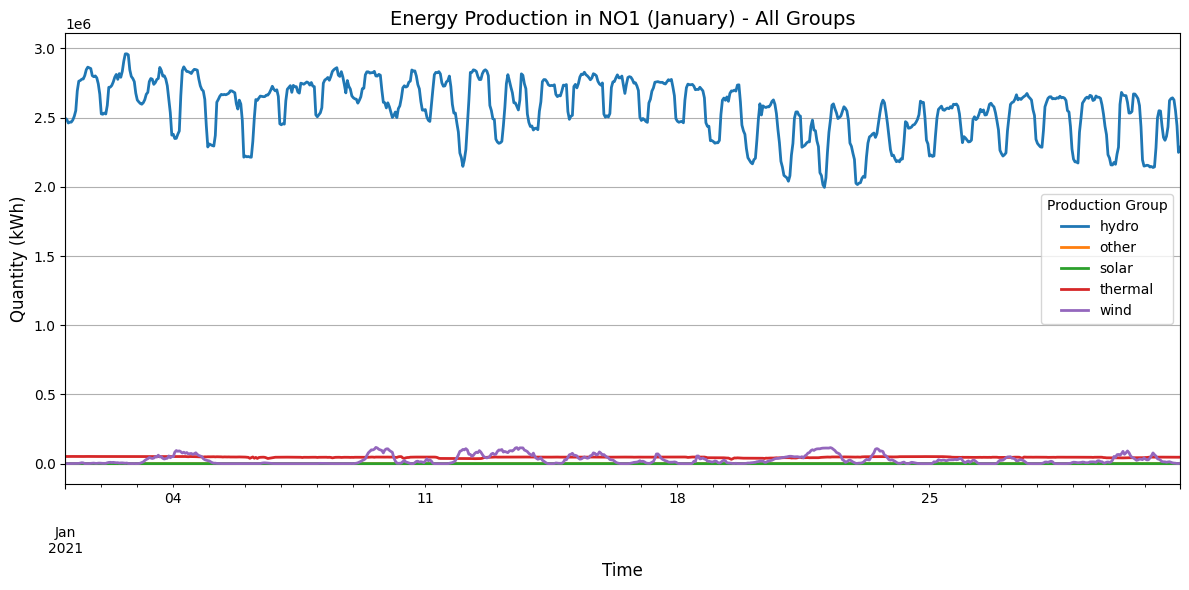

✓ Line plot with all production groups displayed


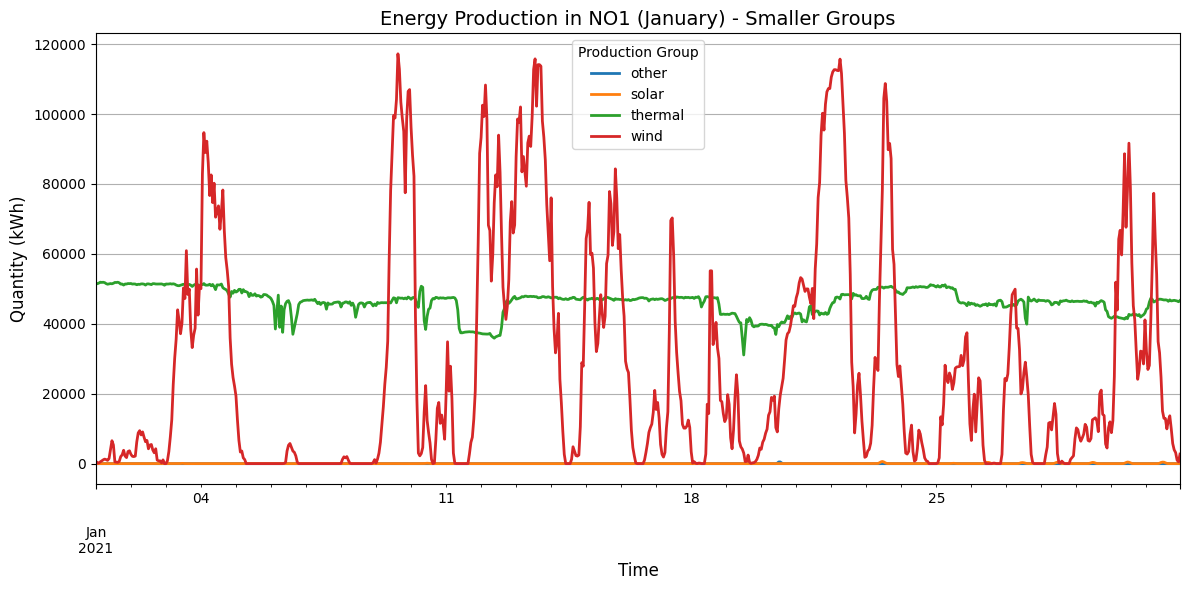

✓ Line plot with smaller production groups displayed


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'startTime' column is datetime and in UTC
df['startTime'] = pd.to_datetime(df['startTime'], utc=True)

# Filter data for the chosen price area and month
selected_area = 'NO1'
selected_month = 1  # January
filtered_df = df[(df['priceArea'] == selected_area) & (df['startTime'].dt.month == selected_month)]

# Pivot the data: production groups as columns
pivot_df = filtered_df.pivot(index='startTime', columns='productionGroup', values='quantityKwh')

# Calculate total per group to identify smaller contributors
total_per_group = pivot_df.sum()
threshold = total_per_group.sum() * 0.05  # Groups contributing less than 5% of total

# --- Plot 1: All production groups ---
plt.figure(figsize=(12, 6))
pivot_df.plot(ax=plt.gca(), linewidth=2)
plt.title(f"Energy Production in {selected_area} (January) - All Groups", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Quantity (kWh)", fontsize=12)
plt.legend(title="Production Group", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

print("✓ Line plot with all production groups displayed")

# --- Plot 2: Smaller production groups only ---
small_groups = total_per_group[total_per_group < threshold].index
if len(small_groups) > 0:
    plt.figure(figsize=(12, 6))
    pivot_df[small_groups].plot(ax=plt.gca(), linewidth=2)
    plt.title(f"Energy Production in {selected_area} (January) - Smaller Groups", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Quantity (kWh)", fontsize=12)
    plt.legend(title="Production Group", fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("✓ Line plot with smaller production groups displayed")
else:
    print("No small production groups below threshold to display")


In [16]:
# Connecting to MongoDB
# Selecting a database and a collection.
database = client['Database']
collection = database['data']

In [17]:
# First, clear the existing collection to avoid duplicates
collection.delete_many({})
print("Cleared existing data from collection")

# Make a copy of the original pandas DataFrame
pandas_df = df.copy()

# Simplify datetime conversion using lambda
datetime_columns = ['startTime', 'endTime', 'lastUpdatedTime']
pandas_df[datetime_columns] = pandas_df[datetime_columns].applymap(
    lambda x: pd.to_datetime(x, errors='coerce').isoformat() if pd.notna(x) else None
)

# Convert the Pandas DataFrame to a list of dictionaries
data_to_insert = pandas_df.to_dict(orient='records')

print(f"\nPreparing to insert {len(data_to_insert)} documents...")
print(f"Sample document: {data_to_insert[0]}")

# Insert the data into the MongoDB collection
collection.insert_many(data_to_insert)

print(f"\n✓ Successfully inserted {len(data_to_insert)} documents into the MongoDB collection.")
print(f"Database: {database.name}")
print(f"Collection: {collection.name}")

Cleared existing data from collection


C:\Users\Erik\AppData\Local\Temp\ipykernel_20184\2043375402.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pandas_df[datetime_columns] = pandas_df[datetime_columns].applymap(



Preparing to insert 215353 documents...
Sample document: {'endTime': '2021-01-01T01:00:00+01:00', 'lastUpdatedTime': '2024-12-20T10:35:40+01:00', 'priceArea': 'NO1', 'productionGroup': 'hydro', 'quantityKwh': 2507716.8, 'startTime': '2020-12-31T23:00:00+00:00'}

✓ Successfully inserted 215353 documents into the MongoDB collection.
Database: Database
Collection: data
